# Lab 3: Data Visualization

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## Reading in the data

In [2]:
titanic = pd.read_csv("titanic_filled.csv")
titanic["Pclass"].astype("category")
titanic["Sex"].astype("category")
titanic["Embarked"].astype("category");

## Classification
### 2.2: Heatmap

In [3]:
# aggregate the data
counts = titanic['Pclass'].value_counts() # count the population size of each Pclass category
# create pivot table of Survival to Pclass by summing the number of passengers according to Pclass and Survival, then div by Pclass population
s_topclass = pd.pivot_table(titanic, values='PassengerId', index ='Survived', columns='Pclass', aggfunc='count') / counts

<Axes: >

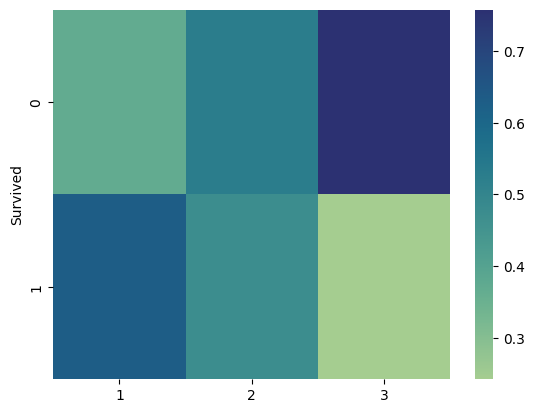

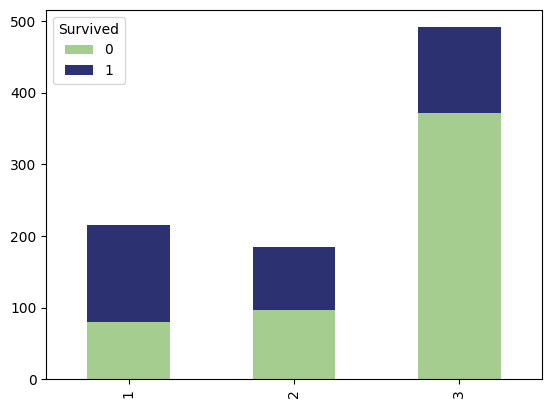

In [4]:
# Visualization / Heatmap
# Picking heatmap cmap value: https://seaborn.pydata.org/tutorial/color_palettes.html
sns.heatmap(data=s_topclass, cmap="crest")
# stacked bar chart (just for me)
# more insight into population size relative to other population
s_topclass2 = s_topclass * counts
s_topclass2.transpose().plot(kind="bar", stacked=True, colormap="crest")

### 2.3
Determine best visualization to compare each of the following variables to the Survived variable: `Fare, Sex, SibSp, Parch, Embarked`

- `Fare`: Ratio - numerical
    - boxplot, violin plot
- `Sex`: Nominal - categorical
    - heatmap
- `SibSp`\ `Parch`: Discrete - numerical
    - box plot, violin plot
- `Embarked`: Nominal - categorical
    - heatmap

### 2.4 Visualizations

<Axes: xlabel='Survived', ylabel='Fare'>

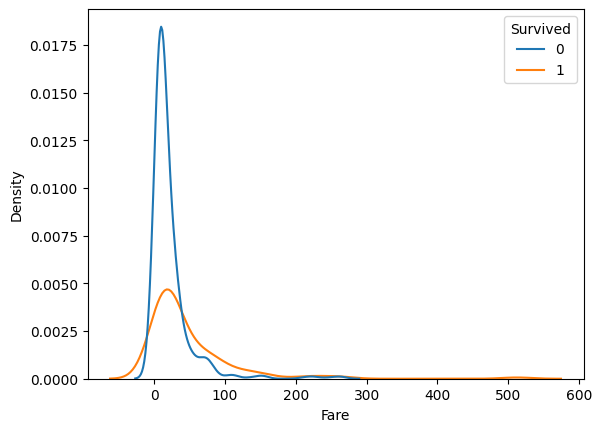

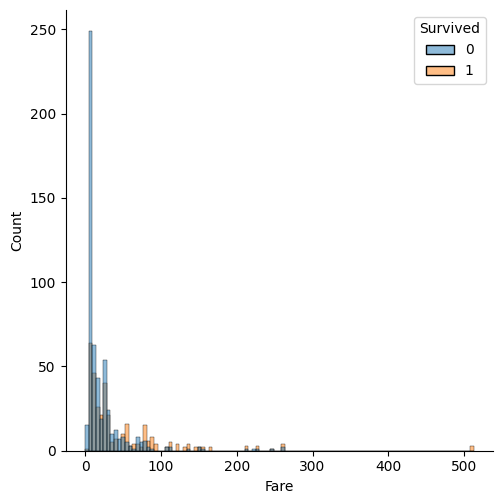

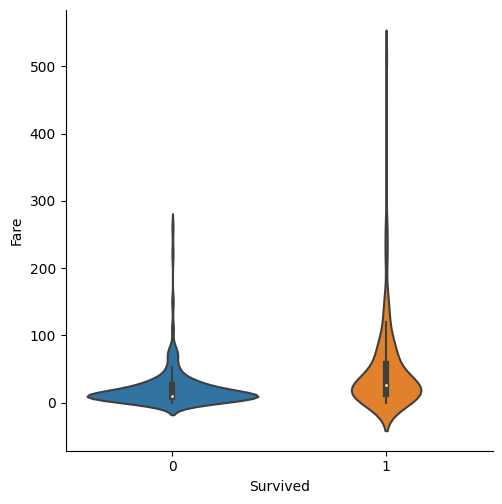

In [5]:
# Fare Plot
# density plot of Fare according to Survived
sns.kdeplot(data=titanic, x="Fare", hue="Survived")
sns.displot()
sns.histplot(data=titanic, x="Fare", hue="Survived")
sns.displot()
# sns.boxplot(data=titanic, x="Survived", y="Fare")
sns.violinplot(data=titanic, x="Survived", y="Fare")

<Axes: ylabel='Survived'>

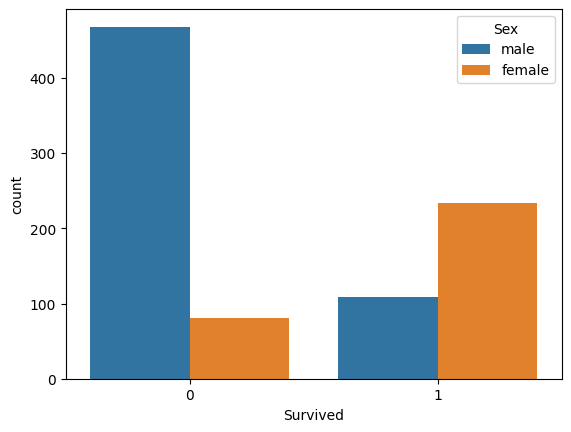

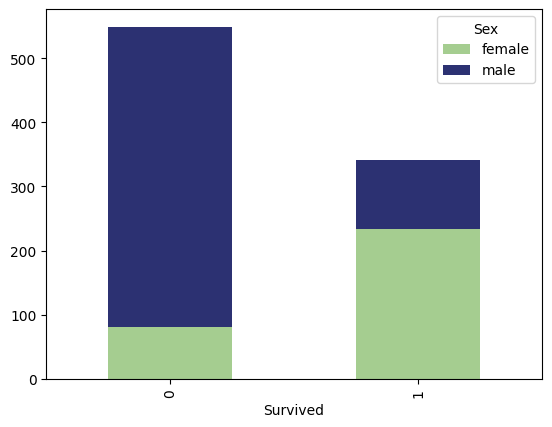

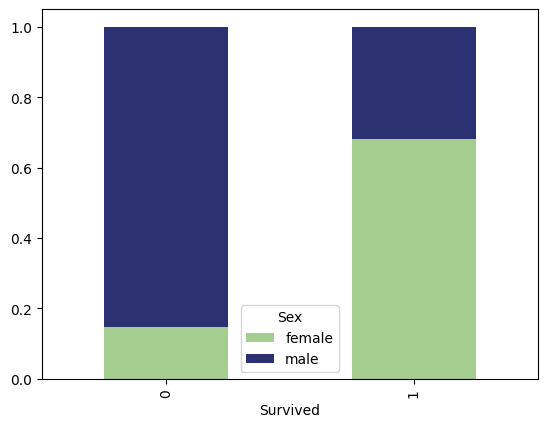

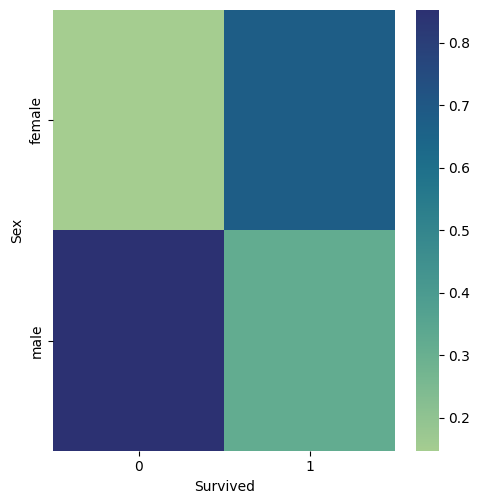

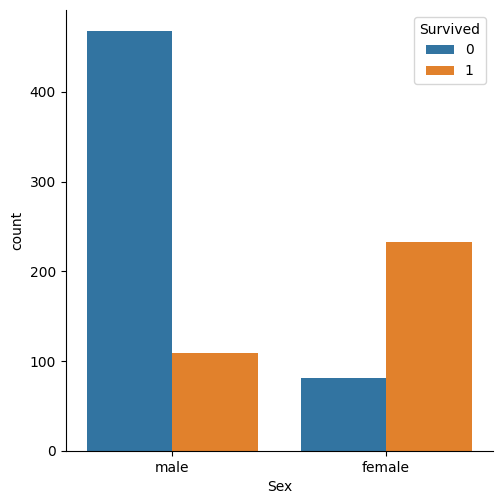

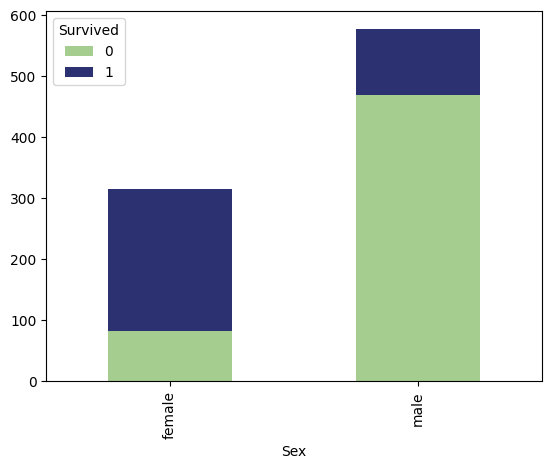

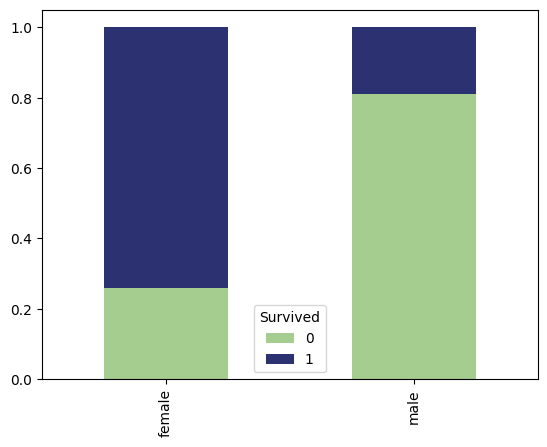

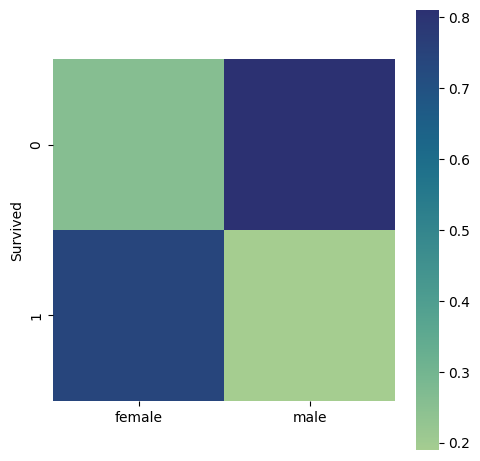

In [6]:
# Sex:
# sex in terms of survived
# as a count value
sns.countplot(titanic, x = "Survived",hue="Sex")
s_tosex = pd.pivot_table(titanic, values='PassengerId', index ='Survived', columns='Sex', aggfunc='count')
s_tosex.plot(kind='bar', stacked=True, colormap="crest")
# as a portion of survived population
s_tosex2 =  pd.pivot_table(titanic, values='PassengerId', index ='Sex', columns='Survived', aggfunc='count')
s_tosex3 = s_tosex2 / titanic['Survived'].value_counts()
s_tosex3.transpose().plot(kind='bar', stacked=True, colormap="crest")
# heatmap 
sns.displot()
sns.heatmap(data=s_tosex3, cmap="crest")

# survival in terms of sex
# as a count value
sns.displot()
sns.countplot(titanic, x = "Sex",hue="Survived")
s_tosex2.plot(kind='bar', stacked=True, colormap="crest")
# as a fraction of sex population
s_tosex4 = s_tosex / titanic['Sex'].value_counts()
s_tosex4.transpose().plot(kind='bar', stacked=True, colormap="crest")
sns.displot()

# heatmap 
sns.heatmap(data=s_tosex4, cmap="crest", square=True)

<Axes: xlabel='Survived', ylabel='SibSp'>

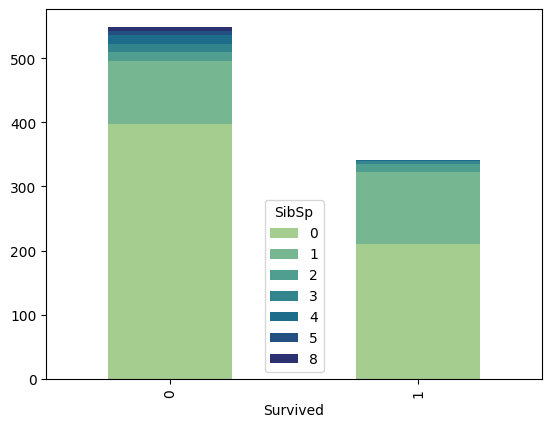

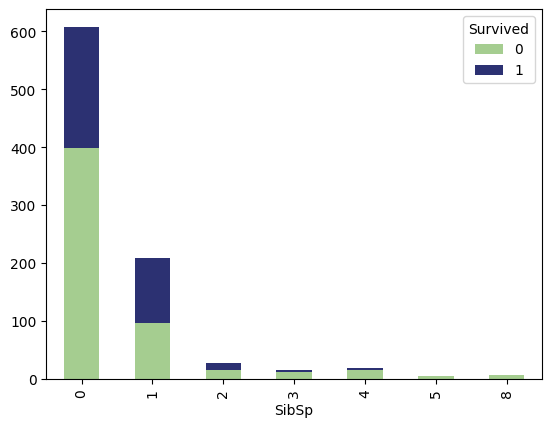

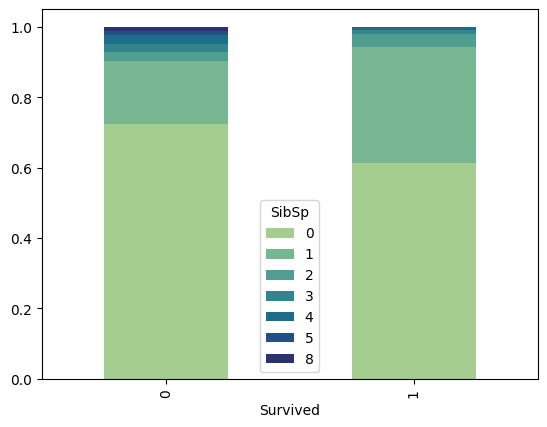

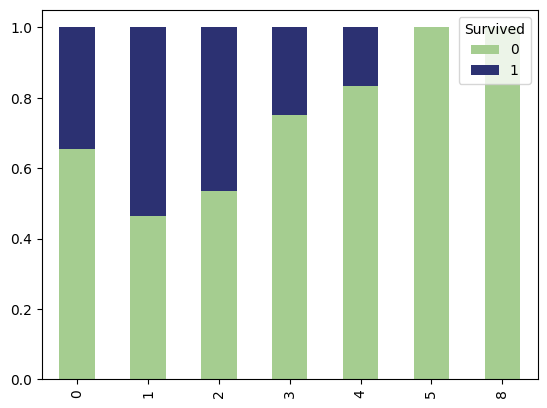

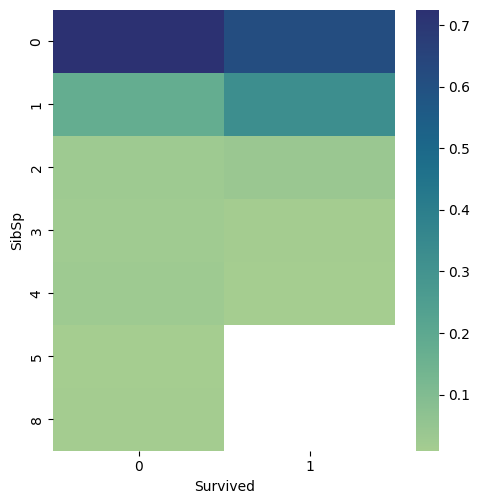

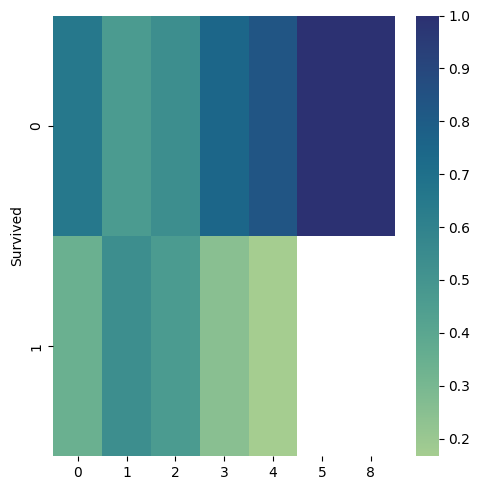

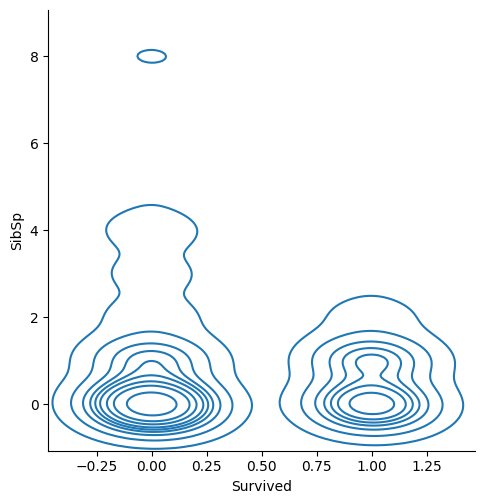

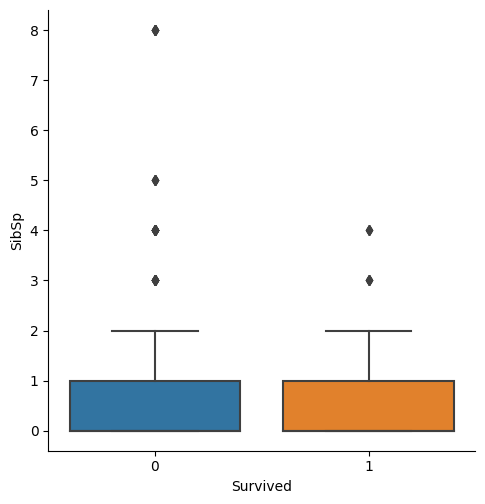

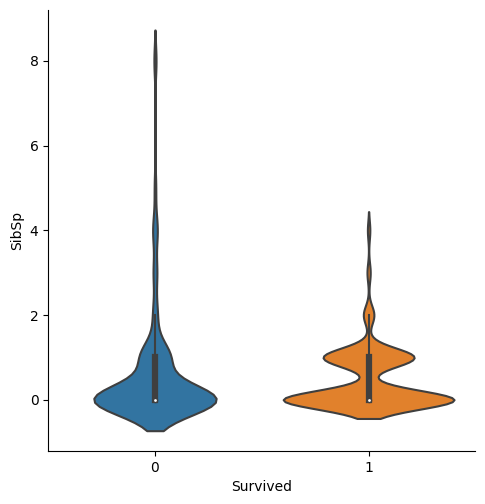

In [7]:
# SibSp
# as a count
# sns.countplot(data=titanic, x="SibSp", hue="Survived")
s_tosibsp = pd.pivot_table(titanic, values='PassengerId', index ='SibSp', columns='Survived', aggfunc='count')
s_tosibsp2 = pd.pivot_table(titanic, values='PassengerId', index ='Survived', columns='SibSp', aggfunc='count') 
s_tosibsp.transpose().plot(kind='bar', stacked=True, colormap="crest")
s_tosibsp2.transpose().plot(kind='bar', stacked=True, colormap="crest")

# as a percent
s_tosibsp3 = s_tosibsp / titanic['Survived'].value_counts()
s_tosibsp3.transpose().plot(kind='bar', stacked=True, colormap="crest")
s_tosibsp4 = s_tosibsp2 / titanic['SibSp'].value_counts()
s_tosibsp4.transpose().plot(kind='bar', stacked=True, colormap="crest")
# s_tosibsp4.transpose().plot(kind="line", colormap="crest")

# heatmap
sns.displot()
sns.heatmap(data=s_tosibsp3, cmap="crest")
sns.displot()
sns.heatmap(data=s_tosibsp4, cmap="crest")
# other methods
sns.displot()
sns.kdeplot(data=titanic, x="Survived", y="SibSp")
sns.displot()
# sns.kdeplot(data=titanic, x="SibSp", hue="Survived")
# sns.displot()
sns.boxplot(data=titanic, x="Survived", y="SibSp")
sns.displot()
sns.violinplot(data=titanic, x="Survived", y="SibSp")

<Axes: xlabel='Survived', ylabel='Parch'>

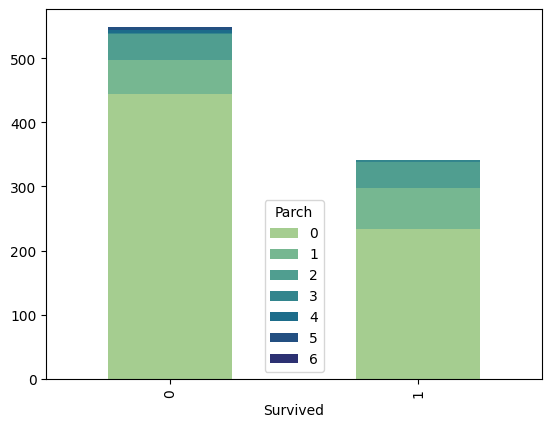

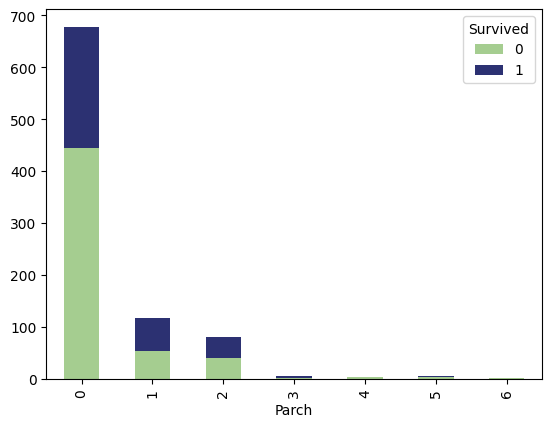

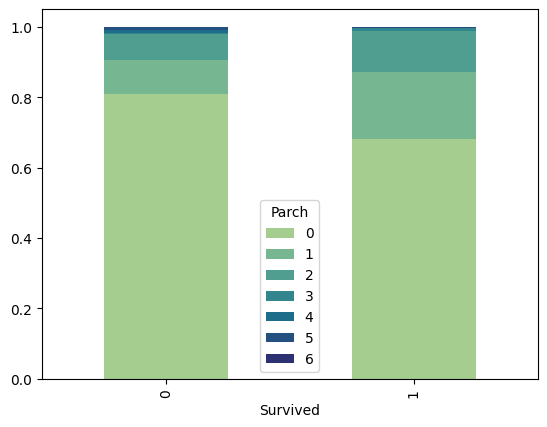

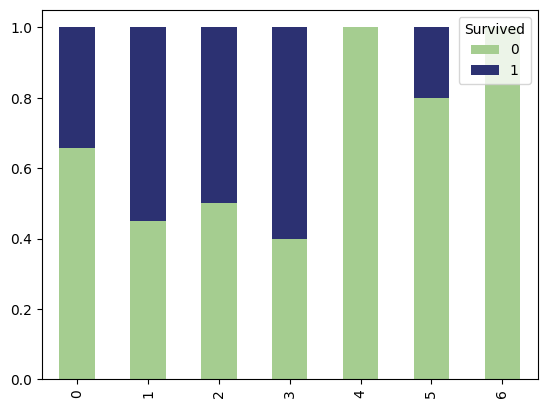

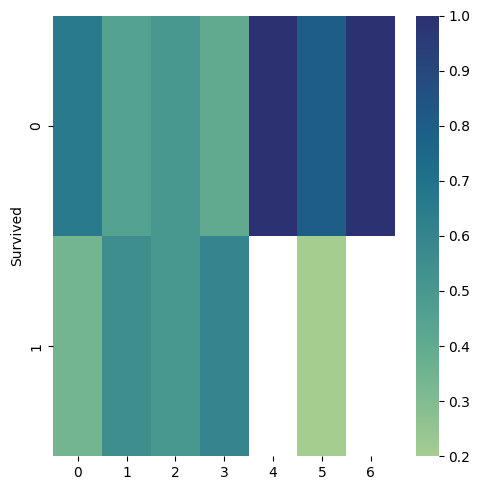

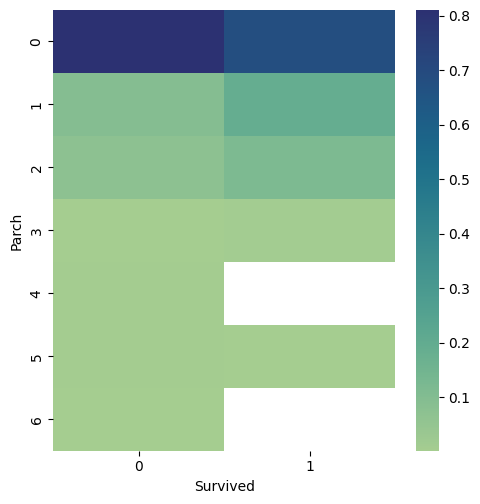

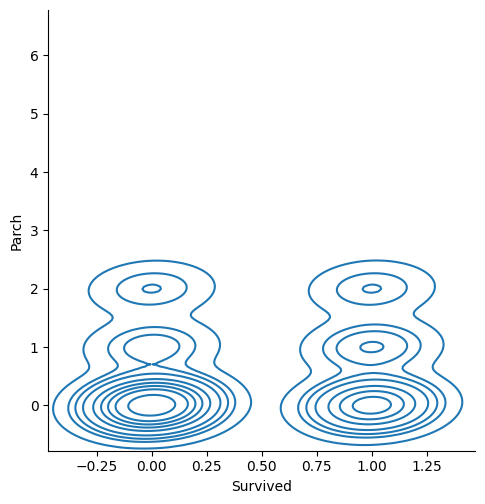

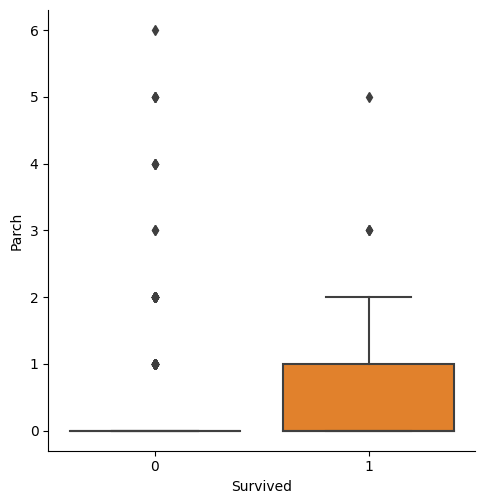

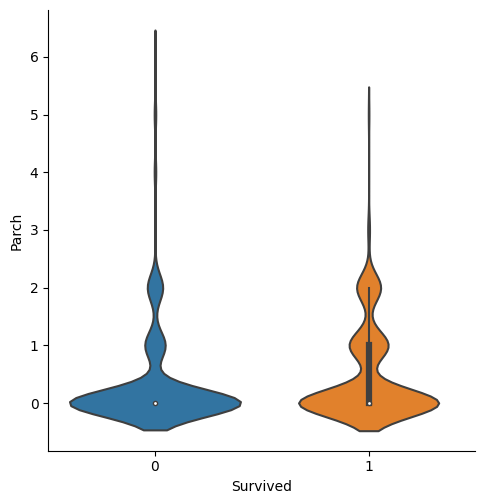

In [8]:
# Parch
# as a count
s_toparch = pd.pivot_table(titanic, values='PassengerId', index ='Parch', columns='Survived', aggfunc='count')
s_toparch2 = pd.pivot_table(titanic, values='PassengerId', index ='Survived', columns='Parch', aggfunc='count')
s_toparch.transpose().plot(kind='bar', stacked=True, colormap="crest")
s_toparch2.transpose().plot(kind='bar', stacked=True, colormap="crest")

# as a percent
s_toparch3 = s_toparch / titanic['Survived'].value_counts()
s_toparch3.transpose().plot(kind='bar', stacked=True, colormap="crest")
s_toparch4 = s_toparch2 / titanic['Parch'].value_counts()
s_toparch4.transpose().plot(kind='bar', stacked=True, colormap="crest")
# heatmap
sns.displot()
sns.heatmap(data=s_toparch4, cmap="crest")
sns.displot()
sns.heatmap(data=s_toparch3, cmap="crest")
# other methods
sns.displot()
# sns.countplot(data=titanic, x="Parch", hue="Survived")
# sns.kdeplot(data=titanic, x="Survived", hue="Parch")
sns.kdeplot(data=titanic, x="Survived", y="Parch")
sns.displot()
sns.boxplot(data=titanic, x="Survived", y="Parch")
sns.displot()
sns.violinplot(data=titanic, x="Survived", y="Parch")

<Axes: ylabel='Survived'>

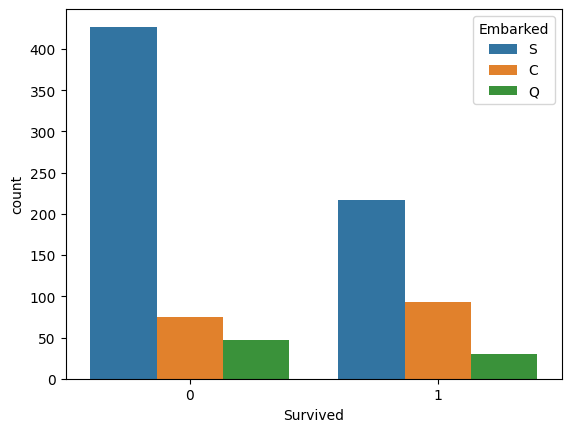

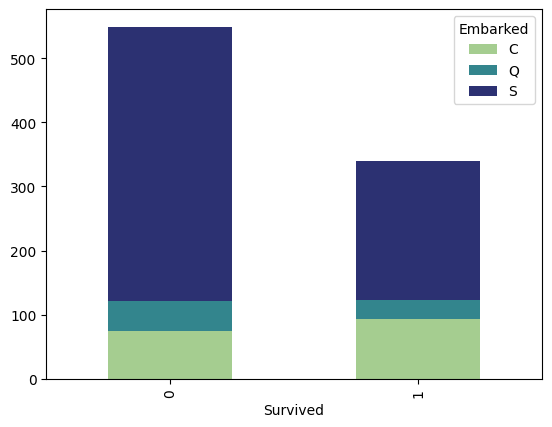

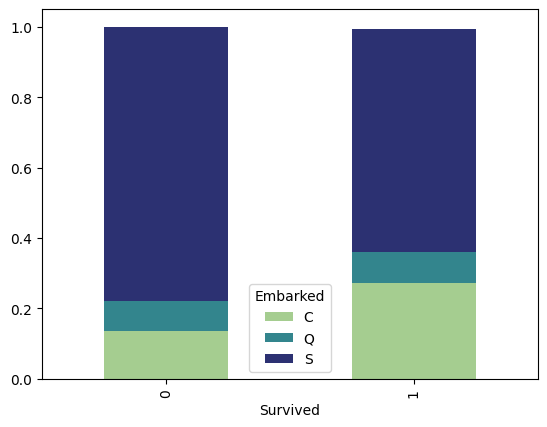

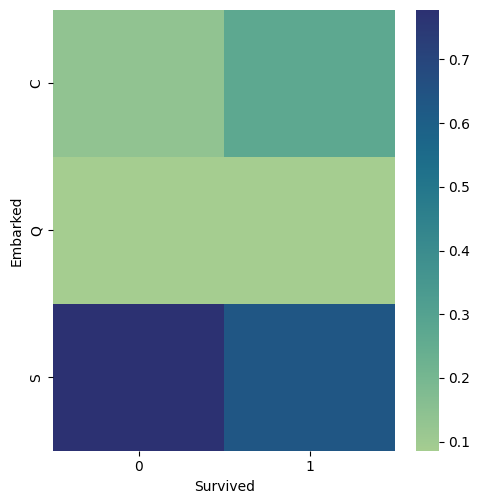

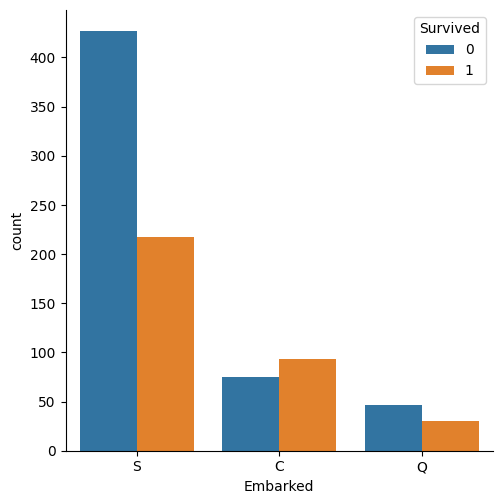

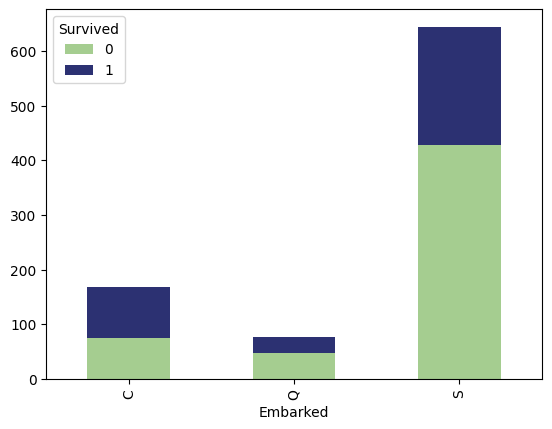

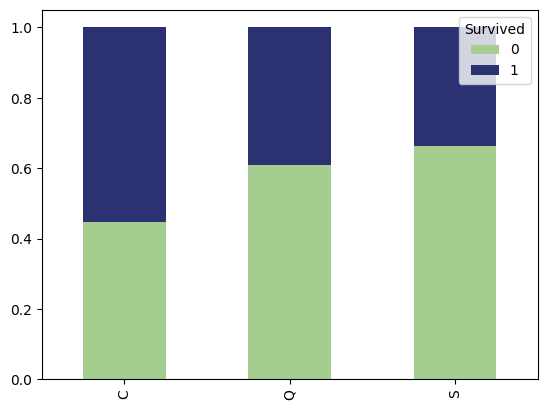

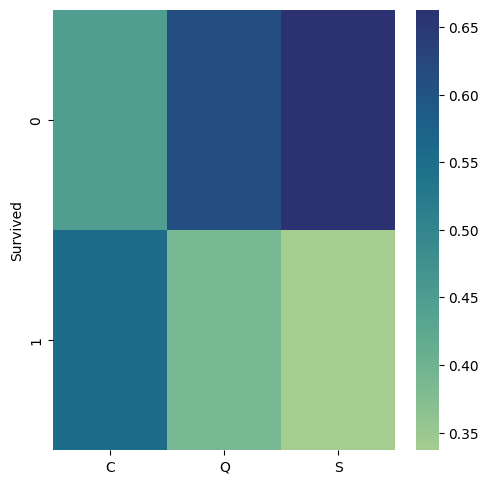

In [9]:
# Embarked:
# embarked in terms of survived
# as count
sns.countplot(titanic, x = "Survived", hue="Embarked")
s_toembarked = pd.pivot_table(titanic, values='PassengerId', index ='Survived', columns='Embarked', aggfunc='count')
s_toembarked.plot(kind='bar', stacked=True, colormap="crest")

# as a portion of survived population
s_toembarked2 =  pd.pivot_table(titanic, values='PassengerId', index ='Embarked', columns='Survived', aggfunc='count')
s_toembarked3 = s_toembarked2 / titanic['Survived'].value_counts()
s_toembarked3.transpose().plot(kind='bar', stacked=True, colormap="crest")
# heatmap 
sns.displot()
sns.heatmap(data=s_toembarked3, cmap="crest")

# survival in terms of embarked
# as count
sns.displot()
sns.countplot(titanic, x = "Embarked", hue="Survived")
s_toembarked2.plot(kind="bar", stacked=True, colormap="crest")
# as a percent of embarked population
s_toembarked4 = s_toembarked / titanic['Embarked'].value_counts()
s_toembarked4.transpose().plot(kind='bar', stacked=True, colormap="crest")
# as heatmap
sns.displot()
sns.heatmap(data=s_toembarked4, cmap="crest")

### 2.5 Visualization to compare Age with Survived. 
For each of
Age fill mean, Age fill median, Age fill mode, and Age fill KNN create a visualization
to compare this to Survived
- `Age`: Interval
    - box plot, violin plot

<Axes: xlabel='Survived', ylabel='Age'>

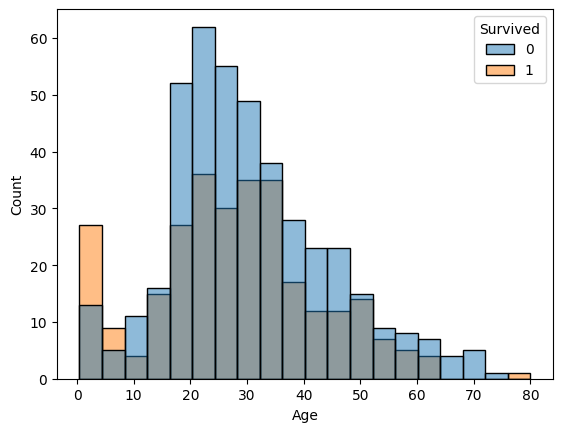

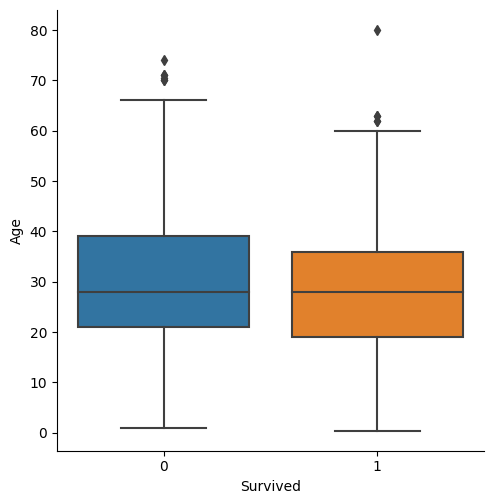

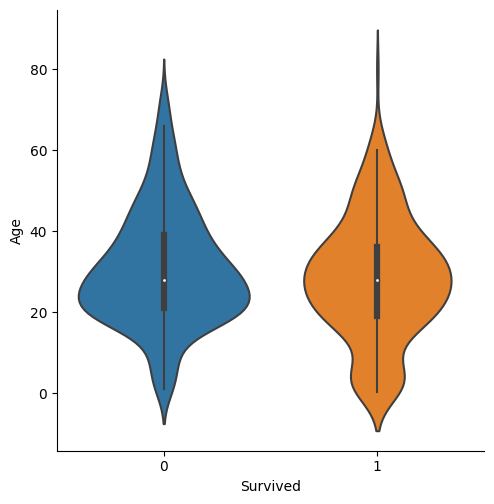

In [10]:
# Age Plot
sns.histplot(data=titanic, x="Age", hue="Survived")
sns.displot()
# sns.countplot(data=titanic, x="Age", hue="Survived")
# sns.kdeplot(data=titanic, x="Age", hue="Survived")
sns.boxplot(data=titanic, x="Survived", y="Age")
sns.displot()
sns.violinplot(data=titanic, x="Survived", y="Age")


<Axes: xlabel='Survived', ylabel='Age_fill_mean'>

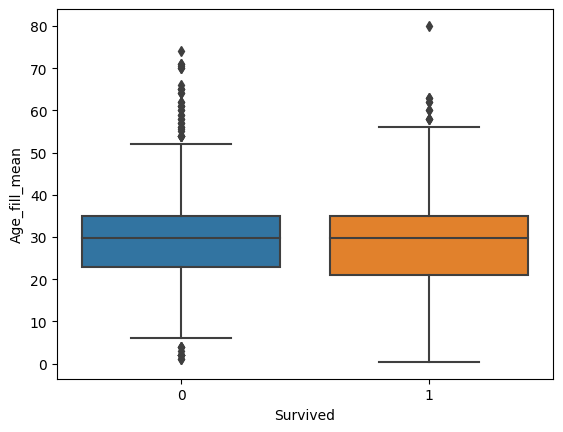

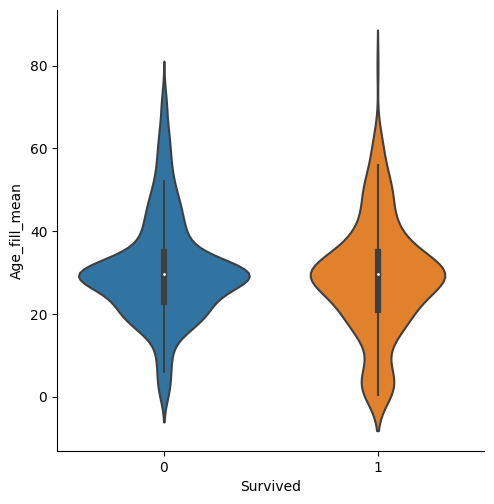

In [11]:
# Age_fill_mean
# sns.countplot(data=titanic, x="Age_fill_mean", hue="Survived")
# sns.kdeplot(data=titanic, x="Age_fill_mean", hue="Survived")
sns.boxplot(data=titanic, x="Survived", y="Age_fill_mean")
sns.displot()
sns.violinplot(data=titanic, x="Survived", y="Age_fill_mean")

<Axes: xlabel='Survived', ylabel='Age_fill_median'>

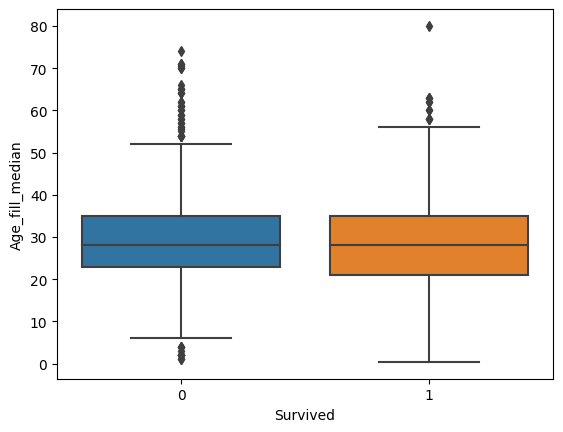

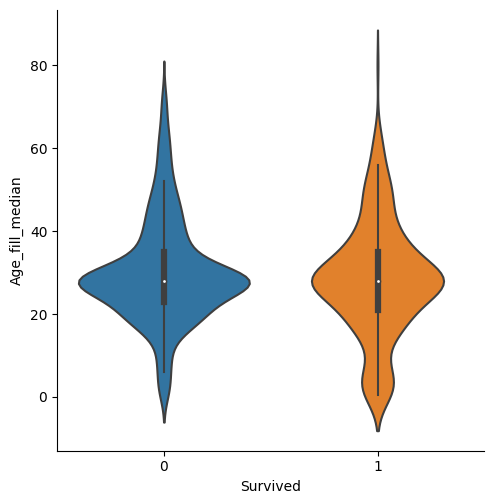

In [12]:
# Age_fill_median
# sns.countplot(data=titanic, x="Age_fill_median", hue="Survived")
# sns.kdeplot(data=titanic, x="Age_fill_median", hue="Survived")
sns.boxplot(data=titanic, x="Survived", y="Age_fill_median")
sns.displot()
sns.violinplot(data=titanic, x="Survived", y="Age_fill_median")

<Axes: xlabel='Survived', ylabel='Age_fill_mode'>

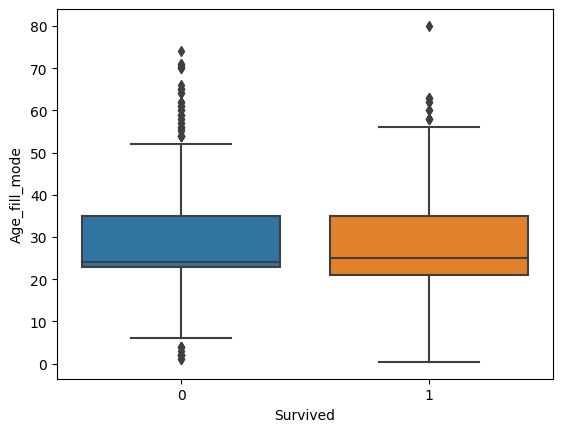

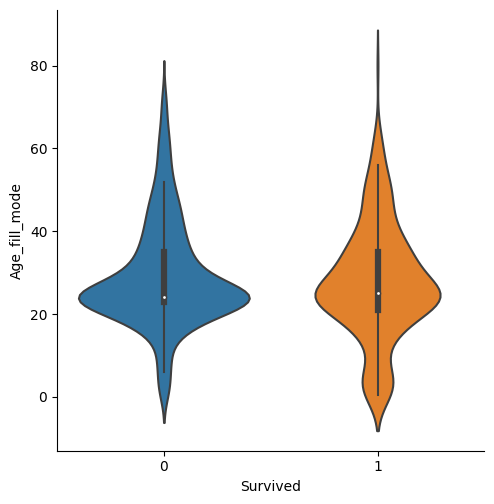

In [13]:
# Age_fill_mode
# sns.countplot(data=titanic, x="Age_fill_mode", hue="Survived")
# sns.kdeplot(data=titanic, x="Age_fill_mode", hue="Survived")
sns.boxplot(data=titanic, x="Survived", y="Age_fill_mode")
sns.displot()
sns.violinplot(data=titanic, x="Survived", y="Age_fill_mode")

<Axes: xlabel='Survived', ylabel='Age_fill_KNN'>

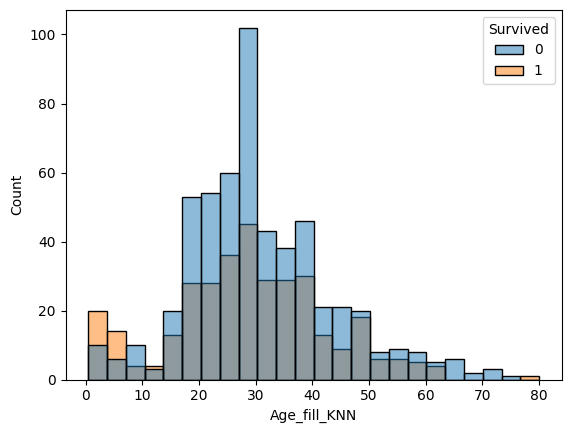

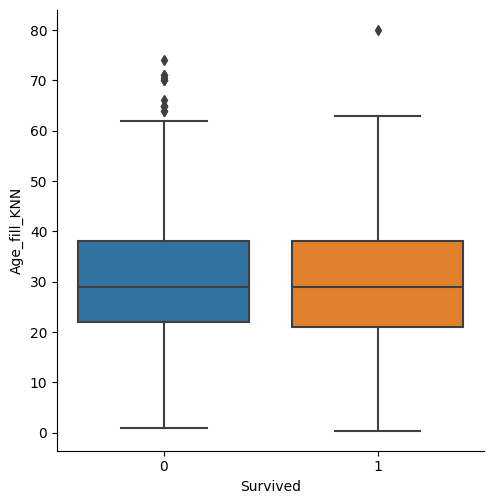

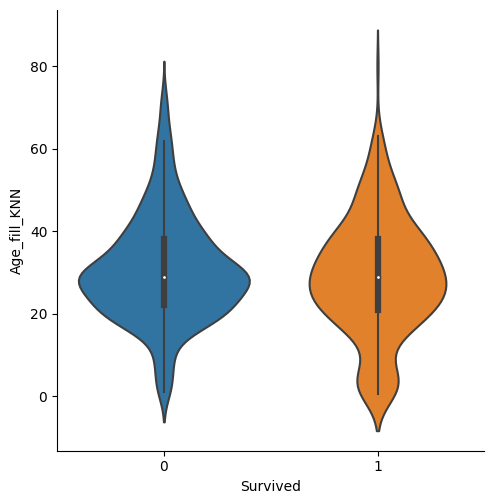

In [14]:
# Age_fill_KNN
sns.histplot(data=titanic, x="Age_fill_KNN", hue="Survived")
# sns.countplot(data=titanic, x="Age_fill_KNN", hue="Survived")
# sns.displot()
# sns.kdeplot(data=titanic, x="Age_fill_KNN", hue="Survived")
sns.displot()
sns.boxplot(data=titanic, x="Survived", y="Age_fill_KNN")
sns.displot()
sns.violinplot(data=titanic, x="Survived", y="Age_fill_KNN")

### Questions

## Comparing Features

<Axes: xlabel='Age_fill_KNN', ylabel='Fare'>

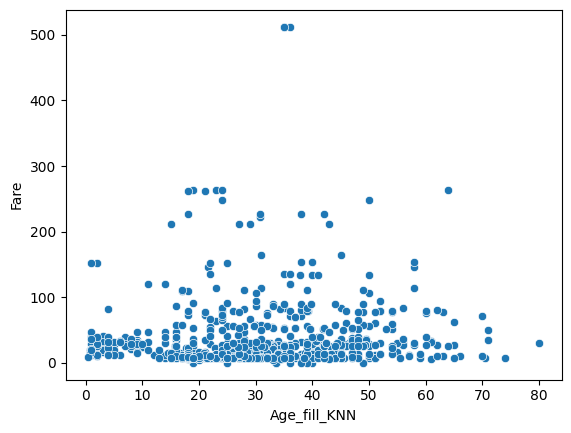

In [15]:
sns.scatterplot(data=titanic, x="Age_fill_KNN", y="Fare")

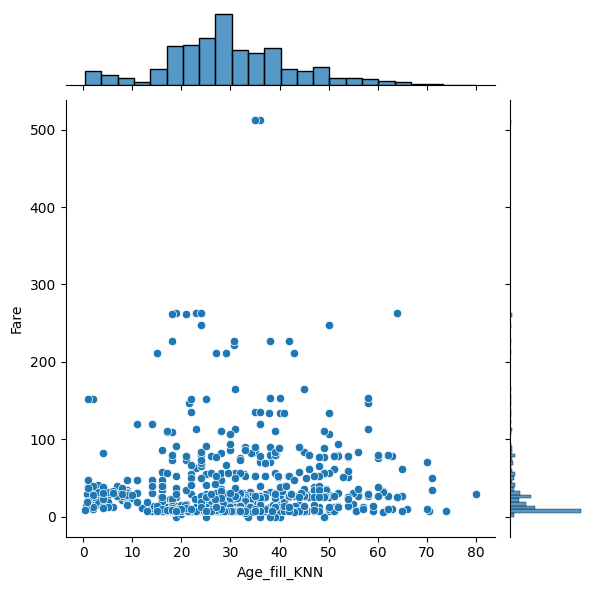

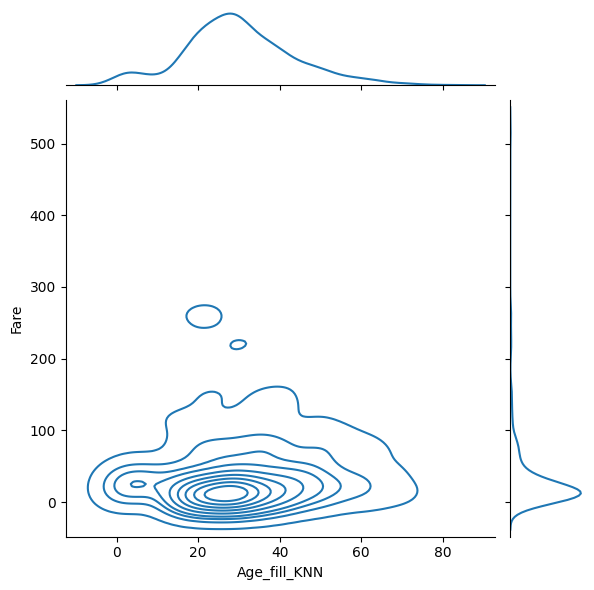

In [16]:
sns.jointplot(data=titanic, x="Age_fill_KNN", y="Fare")
sns.jointplot(data=titanic, x="Age_fill_KNN", y="Fare", kind="kde")
